In [129]:
%%capture
%run final_chars_classification.ipynb



In [130]:
%run table_detector.ipynb

In [131]:
%run final_functions.ipynb

In [132]:
%run preprocessing.ipynb

In [133]:
%run get_rows_number.ipynb

./all_symbols/ 0
./all_symbols/( 73
./all_symbols/) 84
./all_symbols/+ 67
./all_symbols/A 78
./all_symbols/B 67
./all_symbols/C 71
./all_symbols/D 41
./all_symbols/E 74
./all_symbols/F 80
./all_symbols/implies 72
./all_symbols/xor 40
./all_symbols/~ 69


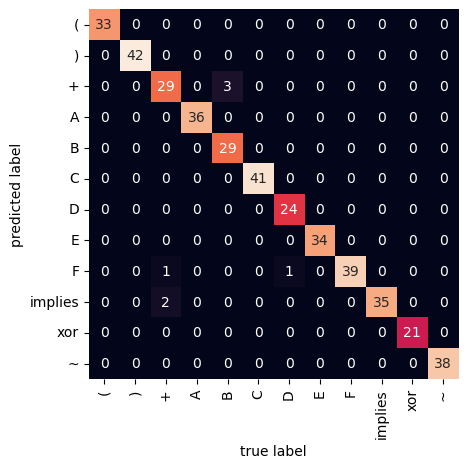

./0_1_symbols/ 0
./0_1_symbols/0 27
./0_1_symbols/1 27


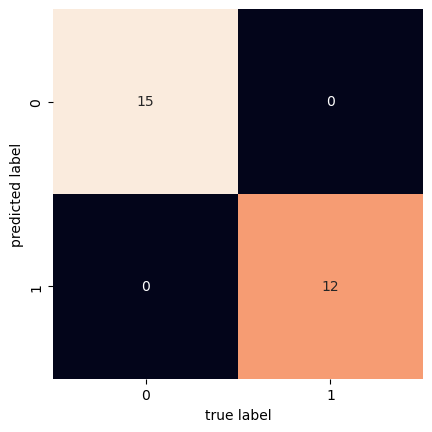

./letters_only_symbols/ 0
./letters_only_symbols/A 78
./letters_only_symbols/B 67
./letters_only_symbols/C 79
./letters_only_symbols/D 72
./letters_only_symbols/E 74
./letters_only_symbols/F 80


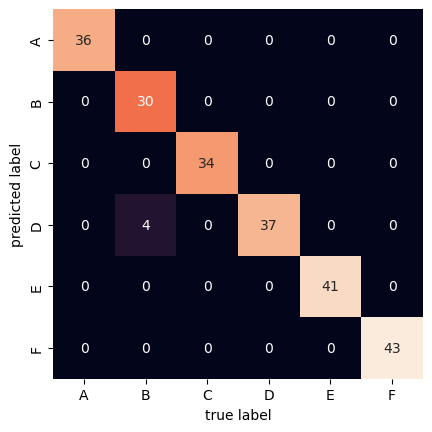

./E_F_symbols/ 0
./E_F_symbols/E 74
./E_F_symbols/F 80


c:\Users\77\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


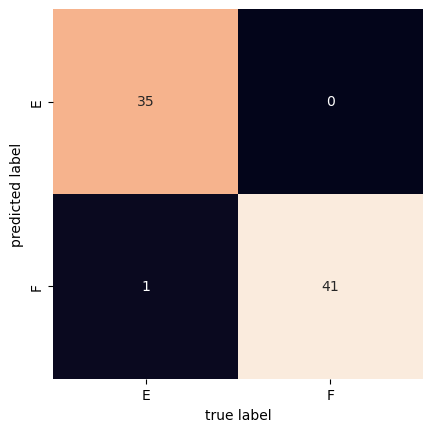

In [134]:
initialize_models(True)
# load_models()

In [135]:
from tabular import tabular

In [136]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    img = preprocessing(img, False)
    if showTrace:
        show_images([img])

    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img)
        cells, col_num, row_num = box_extraction(img, showTrace= showTrace)#, table= True)

        letters = [classify(i, is_letter=True) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        
        if showTrace:
            print(letters)
            print(numbers)
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        solver.solve(numbers,col_num)
        
        solver.logic()
        

    else: 

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        return [get_table(expression) for expression in expressions]

    

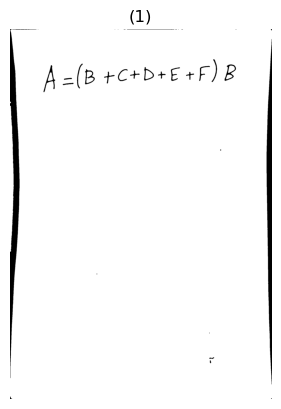

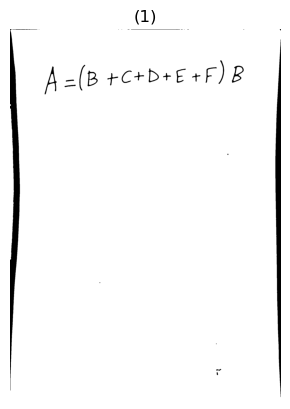

img shape: (2498, 1830), max=255, min=0,median=255.0 and type uint8
tolerance: 91.5


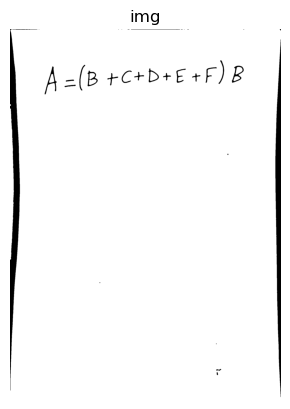

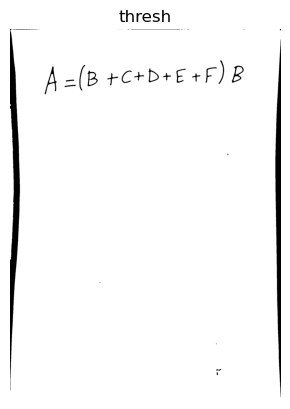

contours before area filtering
156.0, 254.0, 23.0, 29.0, 55.0, -16684.5, -45.0, 641.5, 487.0, -1337.5, -896.5, -1275.5, 848.5, 1259.5, -1118.0, 799.5, 958.5, -2216.0, 1317.0, 5015.5, 1671.0, 4107.5, 1524.0, -1565.5, 4696.5, 5377.5, 1505.5, 1446.5, -4414301.5, 
contours after area filtering
254.0, 641.5, 487.0, 848.5, 1259.5, 799.5, 958.5, 1317.0, 5015.5, 1671.0, 4107.5, 1524.0, 4696.5, 5377.5, 1505.5, 1446.5, 
masks


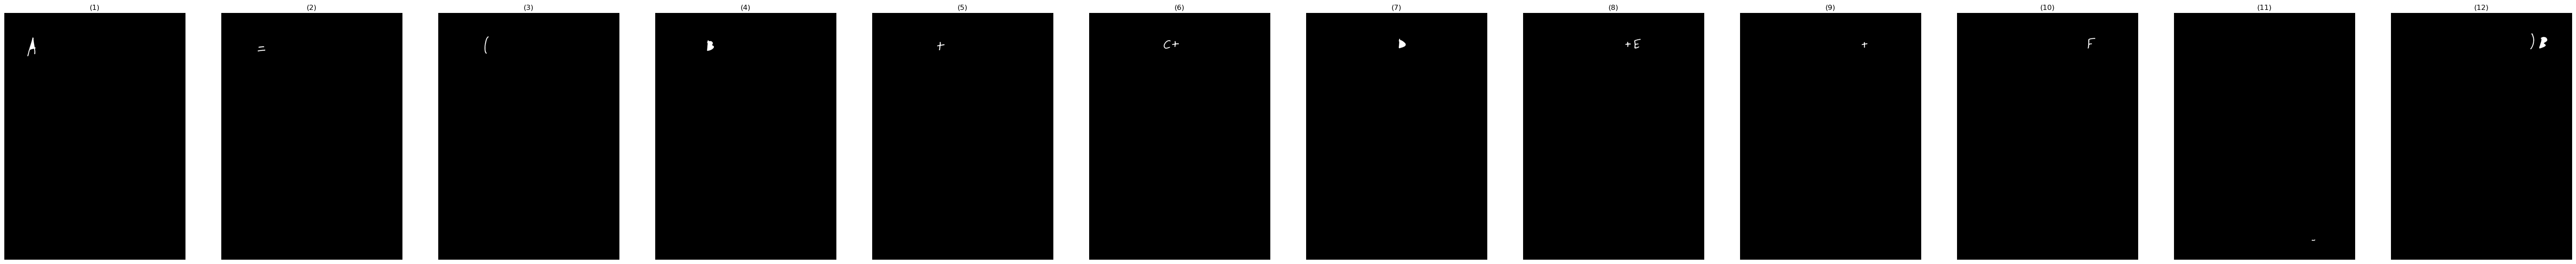

contours after merging


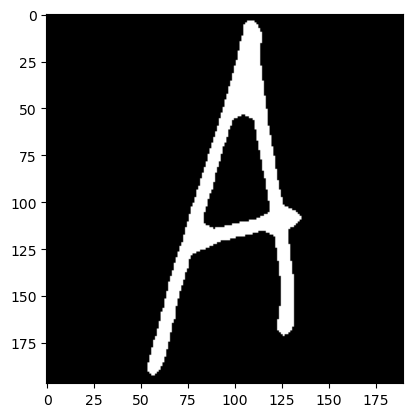

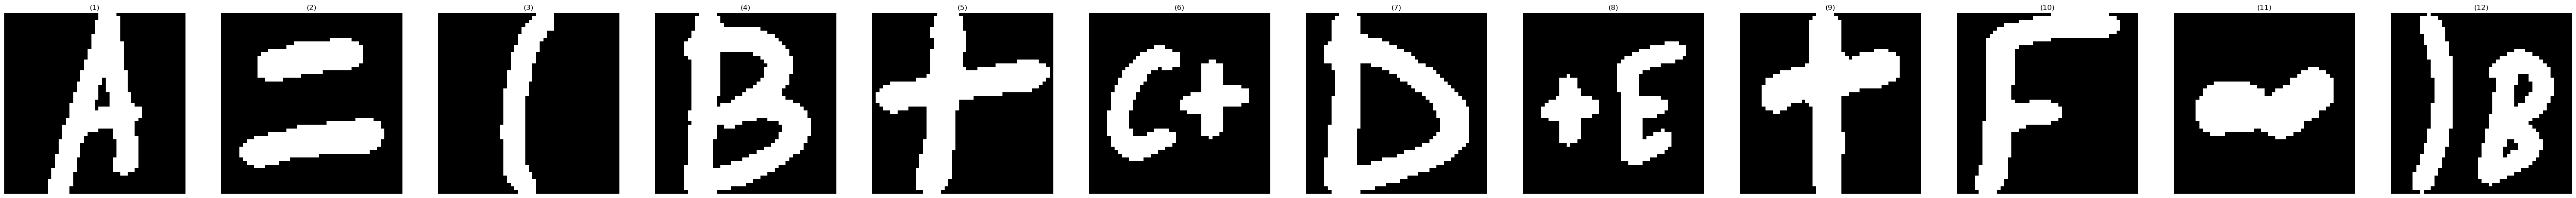

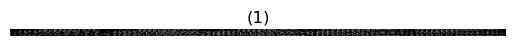

[array(['A', 'B', '(', 'B', '+', 'xor', 'D', 'B', '+', 'F', '~', 'B'],
      dtype='<U7')]
['A' '=' '(' 'B' '+' 'xor' 'D' 'B' '+' 'F' '~' 'B']
( B or xor D and B or F and ~ B 


ParseException: Expected ')', found end of text  (at char 49), (line:1, col:50)

In [144]:
image = cv2.imread("./test_images/t13.jpg")

result = solve_expression(image, is_table=False, showTrace=True)

for r in result: 
    print(r)


